# *Udacity* - **Intro to Data Analysis**

## Lesson 4 - Final Project : ***Investigate Titanic Dataset***

# <center><font color="red">Titanic</font></center>

<center><img src="https://static3.thetravelimages.com/wordpress/wp-content/uploads/2018/11/titanic1-e1542497861799.jpg" height=500 /></center>

<h1> History</h1>

**Titanic** is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the **Titanic** sank after colliding with an iceberg, killing *1502* out of *2224* passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.<br><br>


### 1. Problem Statement


> In this challenge, we need to complete the __analysis__ of what sorts of people were likely to __survive__. In particular,  we apply the tools of __machine learning__ to predict which passengers survived the tragedy?

- Predict whether passenger gonna __survive__ or __not__.


### 2. Data Loading and Description

In [2]:
#importing the Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings   # To ignore any warnings
warnings.filterwarnings("ignore")

print("Setup Complete")


Setup Complete


#### 2.1  Loading the data files 

In [3]:
# Load DataFrame
titanic_data = pd.read_csv('titanic_data.csv')

# Copying original Dataframe for use
titanic = titanic_data.copy()
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2.2 Data Description


Lets describe whats the meaning of the features given the titanic datasets.

#### Variable Definition Key.
- Survival
 - 0= No
 - 1= Yes
- pclass (Ticket class)
 - 1=1st
 - 2=2nd
 - 3=3rd
 
- sex

- age
- sibsp (# of siblings / spouses aboard the Titanic)

- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
- embarked Port of Embarkation.
 - C = Cherbourg,
 - Q = Queenstown,
 - S = Southampton
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower


In [4]:
# Print shape of Dataframe
titanic_data.shape

(891, 12)

In [5]:
# Identifying name of column in DataFrame

titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 3.  Cleaning the data

In [6]:
# Seperate categorical columns
categorical_col = [ col for col in titanic_data if titanic_data[col].nunique() < 10]
categorical_col

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [7]:
# Check if there is any null value
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Seperate categorical columns

numerical_col = [col for col in titanic_data if titanic_data[col].dtype in ['int64', 'float64']]
numerical_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

It look like this dataset is quite organized. however, before using this dataset for analysing and visualizing we need to deal with ..
- Different variable
- Null values

__Different variables present in the datasets__
 - **There are four type of variables**
  - **Numerical Features**: Age, Fare, SibSp and Parch
  - **Categorical Features**: Sex, Embarked, Survived and Pclass
  - **Alphanumeric Features**: Ticket and Cabin(Contains both alphabets and the numeric value)
  - **Text Features**: Name

- We really need to tweak these features so we get the desired form of input data

In [9]:
# In our data 'Ticket' and 'Cabin' have no use for in Analysing so will drop that column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **4. Exploratory Data Analysis**

<a id="section4"></a>
![](https://media.giphy.com/media/aQCCNezRpb9Hq/giphy.gif)

**Exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### 4.1 ***Univariate Analysis***

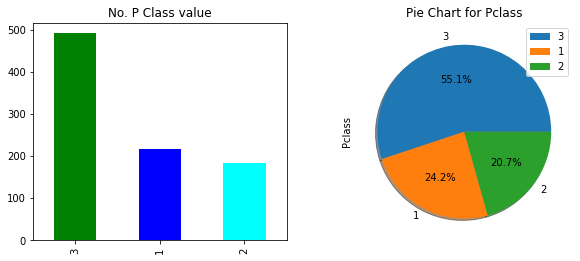

In [12]:
# Lets looks at distribution plot of Pclass
plt.figure(1)


plt.subplot(1,2,1)
titanic_data['Pclass'].value_counts().plot.bar(figsize = (12,4),
                                               color = ['green', 'blue', 'cyan'], 
                                               title = 'No. P Class value')

plt.subplot(1,2,2)
titanic_data['Pclass'].value_counts().plot.pie(figsize = (10,4), autopct = '%1.1f%%', 
                                               shadow = True, title = 'Pie Chart for Pclass')
plt.legend()

plt.show()

In [13]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

>The distribution of `Pclass` shows that they are not divided equally. Majority of passenger has travelled through Third class which 491 i.e. 55%. About 24.2% has travelled through First Class. And Rest 20.7% (184) passenger travelled through Second Class.

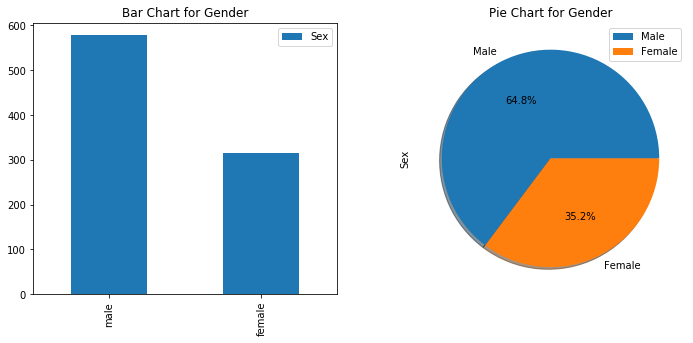

In [14]:
# Lets looks at distribution plot of Sex

plt.figure(1)

plt.subplot(1,2,1)
titanic_data['Sex'].value_counts().plot.bar(figsize = (12, 4), title = 'Bar Chart for Gender')
plt.legend()

plt.subplot(1,2,2)
titanic_data['Sex'].value_counts().plot.pie(figsize = (12,5), shadow = True, autopct = '%1.1f%%',
                                           title = 'Pie Chart for Gender',
                                           labels = ['Male', 'Female'])
plt.legend()

plt.show()

>Majority of Male (64.8%) are travelled than Female which is 35.2%.

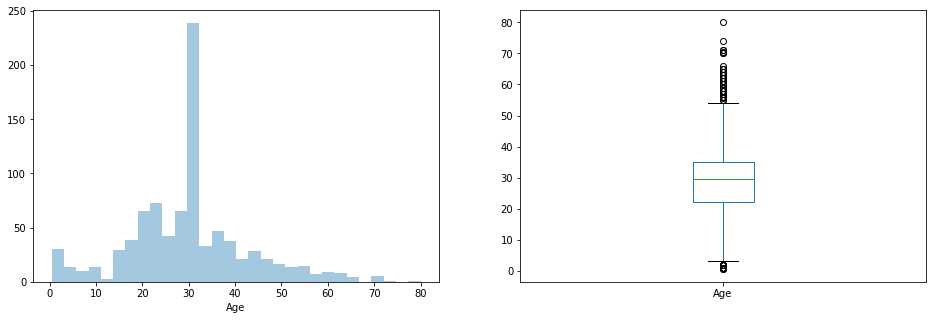

In [15]:
# Lets looks at distribution plot of Age

plt.figure(1)

plt.subplot(1,2,1)
sns.distplot(titanic_data['Age'], kde = False)

plt.subplot(1,2,2)
titanic_data['Age'].plot(kind = 'box',figsize = (16, 5))

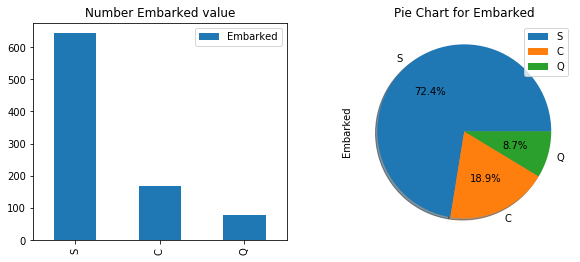

In [16]:
# Lets looks at distribution plot of Pclass
plt.figure(1)


plt.subplot(1,2,1)
titanic_data['Embarked'].value_counts().plot.bar(figsize = (12,4), title = 'Number Embarked value')
plt.legend()


plt.subplot(1,2,2)
titanic_data['Embarked'].value_counts().plot.pie(figsize = (10,4), autopct = '%1.1f%%', 
                                               shadow = True,title = 'Pie Chart for Embarked')
plt.legend()

plt.show()

In [17]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

>The distribution of `Embarked` shows that they are not divided equally. Majority of passenger have embarked through Southampton which 644 i.e. 72.4%. About 18.9% (168) has `Embarked` through Cherbourg. And Rest 8.7% (77) passenger has Embarked through Queenstown.

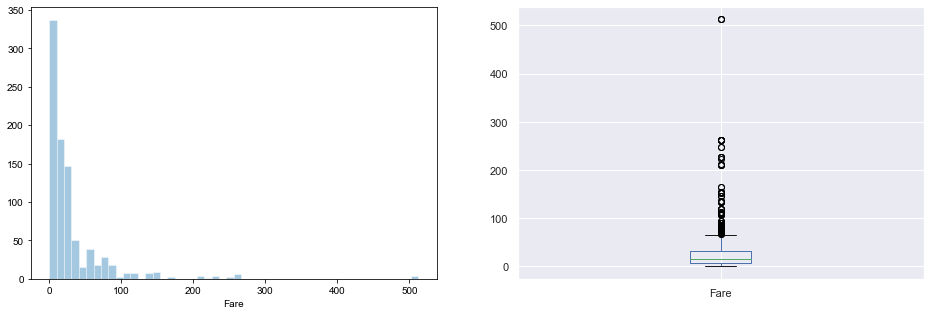

In [18]:
# Lets looks at distribution plot of Fare

plt.figure(1)

plt.subplot(1,2,1)
sns.set(style = 'darkgrid')
sns.distplot(titanic_data['Fare'], kde = False)

plt.subplot(1,2,2)
titanic_data['Fare'].plot(kind = 'box',figsize = (16, 5))

In [19]:
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

>The distribution of `Fare` shows that there are outliers in `Fare`. With centre at 14.454 and 50% of passenger are in IQR of (31 - 7.9104) = 23.0896. With Extremely high outlier 512.329.

### 4.1 ***Bivariate Analysis***


**Gender vs Survived** 


Here, Gender is Explanatory / Independent variable whereas Survived is Response or Dependent variabless. Both variables are Categorical Variable.

In [20]:
# Let's look at the relationship between Gender and Survived
# By Two-Way Table
gender_per = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'], normalize = 'index')
gender_per

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Text(0.5, 0, 'Gender')

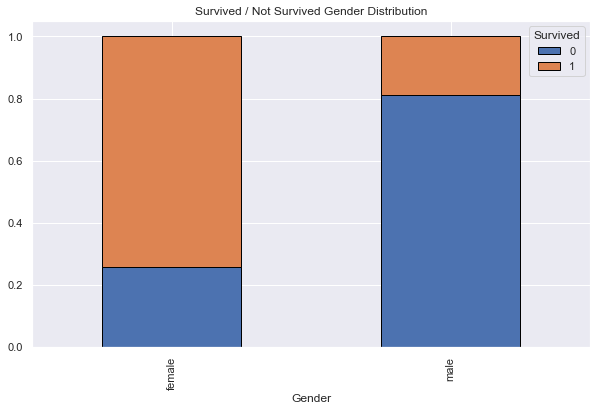

In [21]:
gender_per.div(gender_per.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                       stacked = True,  
                                                       edgecolor = 'black', 
                                                       label = ['Not Survived', 'Survived'],
                                                       figsize = (10,6))

plt.title('Survived / Not Survived Gender Distribution')
plt.xlabel('Gender')

In [22]:
gender = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
gender

Survived,0,1
Sex,,
female,81,233
male,468,109


Text(0, 0.5, 'Number of Passenger')

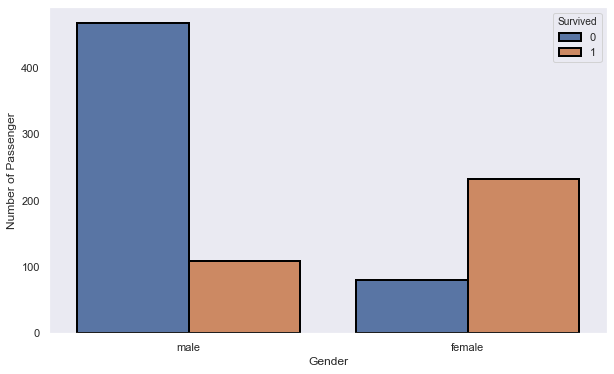

In [23]:
sns.set(style = 'dark')
plt.subplots(figsize = (10, 6))
sns.countplot( x = 'Sex', data = titanic_data, hue = 'Survived', 
              edgecolor = (0,0,0), linewidth = 2)

labels = ['Male', 'Female']

plt.xlabel('Gender')
plt.ylabel('Number of Passenger')

>This bar plot above shows the distribution of female and male survived. The x_label shows gender and the y_label shows % of passenger survived. This bar plot shows that 74% female passenger survived while only ~19% male passenger survived.

**Passenger Class and Survived**

Here, `Pclass` is Explanatory or Independent Variable and Survived is Response or Dependent Variables. Here, Also both are categorical variables.

In [24]:
# Let's look at the relationship between Pclass and Survived
# By Two-Way Table
pclass_p = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'], normalize = 'index')
pclass_p

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Text(0.5, 0, 'Passenger Class')

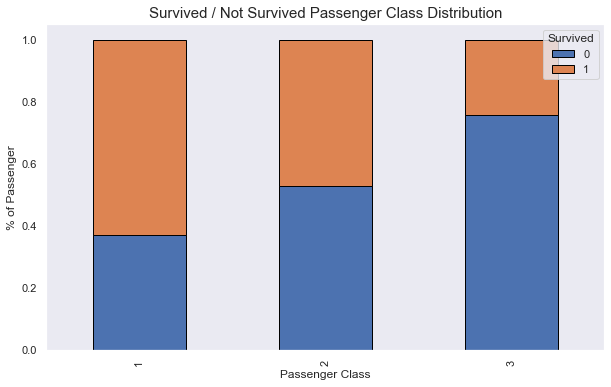

In [25]:
pclass_p.div(pclass_p.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                       stacked = True,  
                                                       edgecolor = 'black', 
                                                       label = ['Not Survived', 'Survived'],
                                                       figsize = (10,6))

plt.title('Survived / Not Survived Passenger Class Distribution', fontsize = 15)
plt.ylabel('% of Passenger')
plt.xlabel('Passenger Class')


In [28]:
pclass_table = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'])
pclass_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0.5, 1.0, 'Survived / Not Survived Passenger Class Distribution')

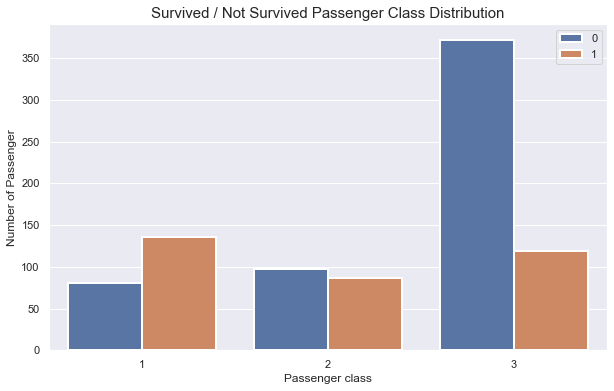

In [29]:
sns.set(style = 'darkgrid')
plt.subplots( figsize = (10, 6))
sns.countplot(x = 'Pclass', data = titanic_data, hue = 'Survived',
             linewidth = 2)

plt.legend()
plt.xlabel('Passenger class')
plt.ylabel('Number of Passenger')
plt.title('Survived / Not Survived Passenger Class Distribution', fontsize = 15)

So it clearly seems that,The survival of the people belong to 3rd class is very least.
It looks like ...
-  63% first class passenger survived titanic tragedy, while
-  48% second class and
-  only 24% third class passenger survived.

**Age and Survived**

Here, `Age` is Explanatory variable or Independent Variable and `Survived` is Response variable. `Age` is Quantitative variable and `Survived` is Categorical variable.

In [30]:
# Lets divide the age into different Age Group

bins= [0,2,4,13,18,21,30,55,110]
labels = ['Infant','Toddler','Kid','Teen','Young_Adult','Adult','Middle_Aged','Senior_Citizen']
titanic_data['Age_Group'] = pd.cut(titanic_data['Age'], bins = bins, labels = labels, right = True)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle_Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle_Aged
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle_Aged


In [31]:
age_group_table = pd.crosstab(titanic_data['Age_Group'],titanic_data['Survived'])
age_group_table

Survived,0,1
Age_Group,,
Infant,9,15
Toddler,4,12
Kid,16,15
Teen,40,28
Young_Adult,48,17
Adult,251,131
Middle_Aged,153,112
Senior_Citizen,28,12


In [32]:
age_group_table = pd.crosstab(titanic_data['Age_Group'],titanic_data['Survived'], normalize = 'index')
age_group_table

Survived,0,1
Age_Group,,
Infant,0.375000,0.625000
Toddler,0.250000,0.750000
Kid,0.516129,0.483871
Teen,0.588235,0.411765
Young_Adult,0.738462,0.261538
Adult,0.657068,0.342932
Middle_Aged,0.577358,0.422642
Senior_Citizen,0.700000,0.300000


>It shows that children and infants were the priority.

### **5. Data Pre-Processing**

In [33]:
# Lets divide the Fare in different group
bins= [0,4,10,20,45,550]
labels = [0,1,2,3,4]
titanic_data['Fare_group'] = pd.cut(titanic_data['Fare'], bins = bins, labels = labels, right = True)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle_Aged,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle_Aged,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle_Aged,1


#### ***5.1. Label Encoding***

In [34]:
from sklearn.preprocessing import LabelEncoder

categorical_column = ['Sex', 'Embarked', 'Age_Group']

label_data = titanic_data.copy()

label_encoder = LabelEncoder()

#for col in categorical_column:
#    label_data[col] = label_encoder.fit_transform(titanic_data[col])
    
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
#titanic_data['Fare_group'] = label_encoder.fit_transform(titanic_data['Fare_group'])
titanic_data['Age_Group'] = label_encoder.fit_transform(titanic_data['Age_Group'])

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,3,1


In [36]:
# Dropping column before removing columns which is now base less
col = ['PassengerId', 'Name', 'Age','Ticket','Fare','Cabin']
new_titanic_data = titanic_data.drop(col, axis = 1)

new_titanic_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_group
0,0,3,1,1,0,S,0,1
1,1,1,0,1,0,C,3,4
2,1,3,0,0,0,S,0,1
3,1,1,0,1,0,S,3,4
4,0,3,1,0,0,S,3,1


In [45]:
new_titanic_data.dropna(axis = 0, inplace = True)
#new_titanic_data['Fare_group'].dropna(axis = 0)

new_titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
Age_Group     0
Fare_group    0
dtype: int64

In [47]:
new_titanic_data.head() #This data is going to put in out Model

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_group
0,0,3,1,1,0,S,0,1
1,1,1,0,1,0,C,3,4
2,1,3,0,0,0,S,0,1
3,1,1,0,1,0,S,3,4
4,0,3,1,0,0,S,3,1


In [49]:
# Obtain Target and Feature variable

Y = new_titanic_data.Survived
X = new_titanic_data.drop('Survived', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

# Break off validation data from training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 0)